# **INTRODUCTION**


This notebook loads, cleans, and preprocesses Owl migration detection data from Excel sheets, performs temporal feature engineering (sorting timestamps, computing time differences, classifying movement events), and prepares the dataset for further analysis and modeling

# **Import Required Libraries**

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Exploratory Data Analysis (EDA)**

In [4]:
file_path = "Owl-Data.xlsx"
xls = pd.ExcelFile(file_path)
xls.sheet_names

['80840',
 '80839',
 '80838',
 '80837',
 '80835',
 '80834',
 '80833',
 '80830',
 '80832',
 '80829',
 '80828',
 '80827',
 '80826',
 '80824',
 '80823',
 '80822',
 '80821',
 '80820',
 '80819',
 '80818',
 '80817',
 '80816',
 '80815',
 '80814',
 '80813',
 '80812',
 '80810',
 '80809',
 '80808',
 '80807',
 '80806',
 '80805',
 'Sheet1',
 'Sheet2',
 '80804',
 '80803',
 '80802',
 '80801',
 '80800',
 '80798',
 '80796',
 '80795',
 '80207',
 '80204']

In [5]:
all_dfs = []

for sheet in xls.sheet_names:
    print(f"Loading owl {sheet}...")

    df_sheet = pd.read_excel(file_path, sheet_name=sheet)

    # Add owl ID to the data (very important!)
    df_sheet["motusTagID"] = sheet

    all_dfs.append(df_sheet)

# Combine everything
df_raw = pd.concat(all_dfs, ignore_index=True)

print("Merged shape:", df_raw.shape)
df_raw.head()

Loading owl 80840...
Loading owl 80839...
Loading owl 80838...
Loading owl 80837...
Loading owl 80835...
Loading owl 80834...
Loading owl 80833...
Loading owl 80830...
Loading owl 80832...
Loading owl 80829...
Loading owl 80828...
Loading owl 80827...
Loading owl 80826...
Loading owl 80824...
Loading owl 80823...
Loading owl 80822...
Loading owl 80821...
Loading owl 80820...
Loading owl 80819...
Loading owl 80818...
Loading owl 80817...
Loading owl 80816...
Loading owl 80815...
Loading owl 80814...
Loading owl 80813...
Loading owl 80812...
Loading owl 80810...
Loading owl 80809...
Loading owl 80808...
Loading owl 80807...
Loading owl 80806...
Loading owl 80805...
Loading owl Sheet1...
Loading owl Sheet2...
Loading owl 80804...
Loading owl 80803...
Loading owl 80802...
Loading owl 80801...
Loading owl 80800...
Loading owl 80798...
Loading owl 80796...
Loading owl 80795...
Loading owl 80207...
Loading owl 80204...
Merged shape: (305845, 45)


,Unnamed: 0,hitID,runID,batchID,ts,tsCorrected,DATE,TIME,sig,sigsd,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Port #1,Port #2,Port #3,Port #4,
0,118314.0,2.644432e+10,702884163.0,14989130.0,1.697614e+09,1.697614e+09,2023-10-18 01:29:50.159,2023-10-18 01:29:50.159,-55.4792,52.8298,...,NaN,NaN,NaN,0 (N),NaN,NaN,NaN,NaN,NaN,NaN
1,118315.0,2.644432e+10,702884163.0,14989130.0,1.697614e+09,1.697614e+09,2023-10-18 01:30:21.854,2023-10-18 01:30:21.854,-51.7197,5.7551,...,0.438518,NaN,4.0,2023-10-18 01:30:21.854000,0.412740,NaN,NaN,NaN,NaN,NaN
2,118319.0,2.644432e+10,702884163.0,14989130.0,1.697614e+09,1.697614e+09,2023-10-18 01:30:53.549,2023-10-18 01:30:53.549,-44.6261,9.2732,...,0.439067,NaN,4.0,2023-10-18 01:31:25.245000,0.330030,NaN,NaN,NaN,NaN,NaN
3,118325.0,2.644432e+10,702884163.0,14989130.0,1.697614e+09,1.697614e+09,2023-10-18 01:31:25.245,2023-10-18 01:31:25.245,-54.1483,35.4253,...,0.402870,NaN,4.0,2023-10-18 01:31:56.940000,0.270506,NaN,NaN,NaN,NaN,NaN
4,118330.0,2.644432e+10,702884163.0,14989130.0,1.697614e+09,1.697614e+09,2023-10-18 01:31:56.940,2023-10-18 01:31:56.940,-44.3938,17.2196,...,0.448004,NaN,4.0,2023-10-18 01:32:28.635000,0.313213,NaN,NaN,NaN,NaN,NaN


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305845 entries, 0 to 305844
Data columns (total 45 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   102899 non-null  float64       
 1   hitID        102899 non-null  float64       
 2   runID        102899 non-null  float64       
 3   batchID      102899 non-null  float64       
 4   ts           102899 non-null  float64       
 5   tsCorrected  102899 non-null  float64       
 6   DATE         102899 non-null  datetime64[ns]
 7   TIME         102899 non-null  datetime64[ns]
 8   sig          102899 non-null  float64       
 9   sigsd        102899 non-null  float64       
 10  noise        102899 non-null  float64       
 11  snr          102147 non-null  float64       
 12  freq         102899 non-null  float64       
 13  freqsd       102899 non-null  float64       
 14  slop         102899 non-null  float64       
 15  burstSlop    102899 non-null  floa

In [7]:
df_raw.shape

(305845, 45)

In [8]:
df_raw['datetime'] = pd.to_datetime(df_raw['DATE'], errors='coerce')


**Sort Data by Tag ID and Timestamp**

In [9]:
df_raw = df_raw.sort_values(['motusTagID', 'datetime']).reset_index(drop=True)


**Compute Time Difference Between Detections**

In [10]:
df_raw['time_diff'] = (
    df_raw.groupby('motusTagID')['datetime']
          .diff()
          .dt.total_seconds()
          .fillna(0)
)


In [11]:
thr = df_raw['time_diff'].mean() + 2 * df_raw['time_diff'].std()
print("Threshold (sec):", thr)


Threshold (sec): 16869.92334479647


In [12]:
df_raw['movement_class'] = (df_raw['time_diff'] > thr).astype(int)
df_raw['movement_class'].value_counts()


,count
movement_class,
0,305748
1,97


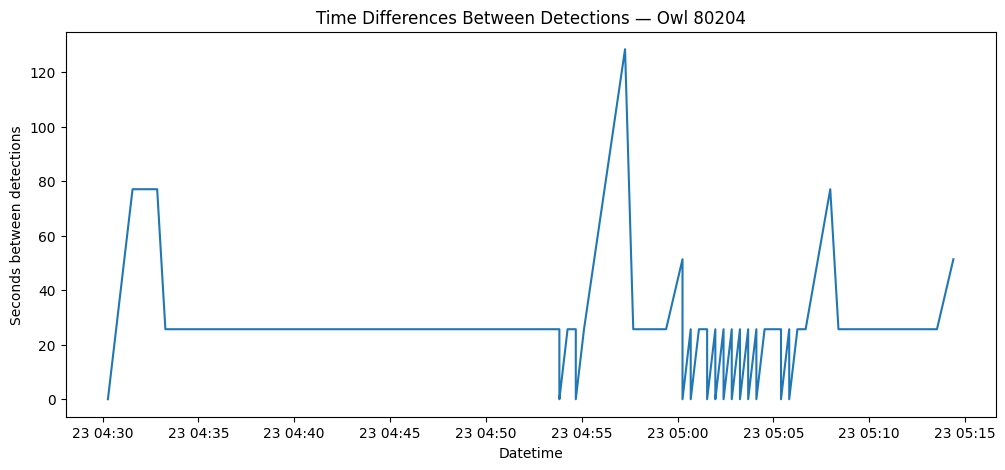

In [13]:
owl_id = df_raw['motusTagID'].unique()[0]  # pick first automatically

df_owl = df_raw[df_raw['motusTagID'] == owl_id]

plt.figure(figsize=(12,5))
plt.plot(df_owl['datetime'], df_owl['time_diff'])
plt.title(f"Time Differences Between Detections — Owl {owl_id}")
plt.ylabel("Seconds between detections")
plt.xlabel("Datetime")
plt.show()


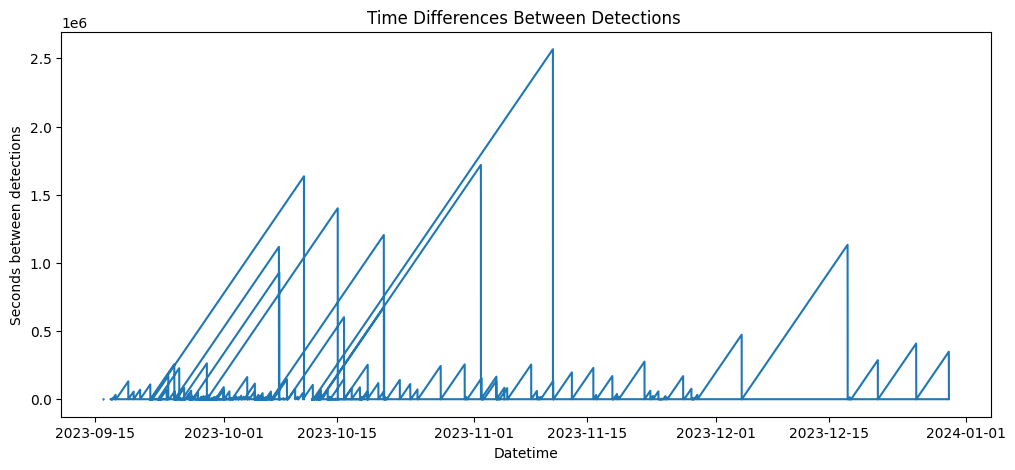

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df_raw['datetime'], df_raw['time_diff'])
plt.title("Time Differences Between Detections ")
plt.ylabel("Seconds between detections")
plt.xlabel("Datetime")
plt.show()

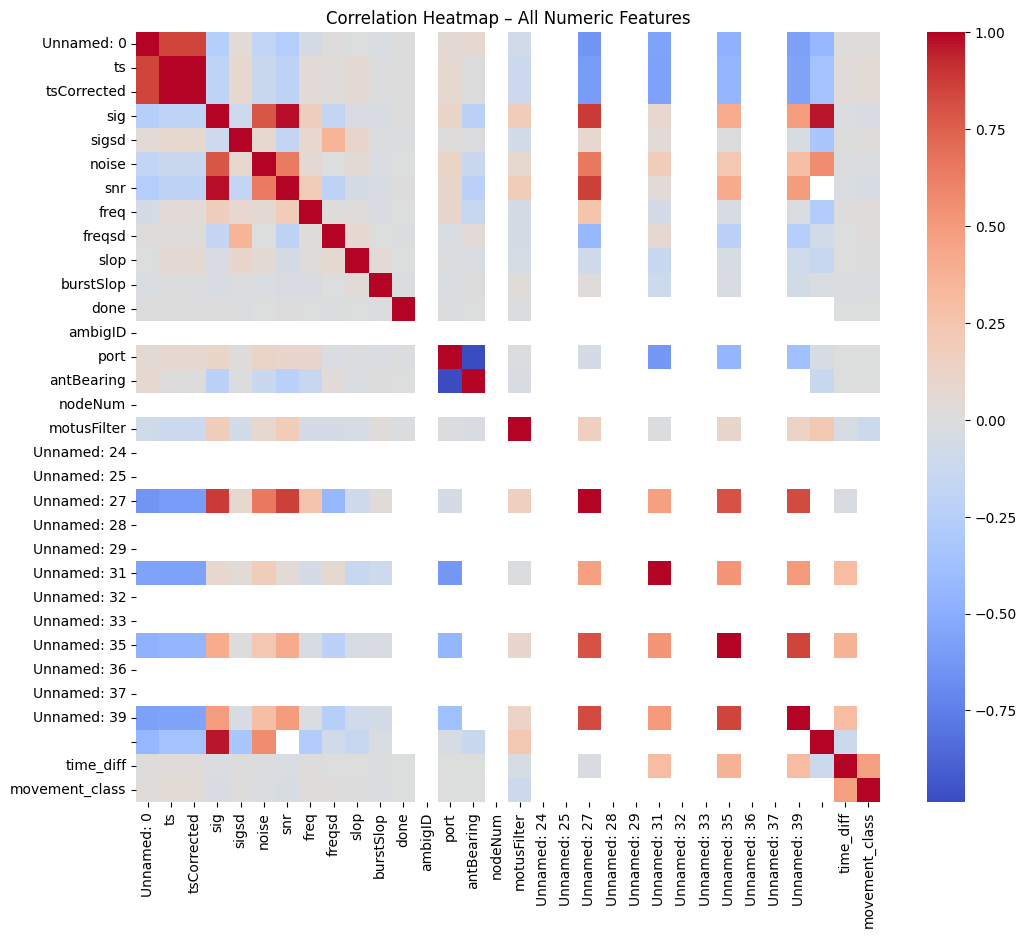

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically detect numeric columns
numeric_cols = df_raw.select_dtypes(include=['float64', 'int64']).columns

# Columns to exclude (not meaningful for correlation)
drop_cols = ['hitID', 'runID', 'batchID', 'motusTagID', 'runLen']

# Final numeric columns for heatmap
numeric_cols = [col for col in numeric_cols if col not in drop_cols]

plt.figure(figsize=(12, 10))
sns.heatmap(df_raw[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap – All Numeric Features")
plt.show()


# **Data Cleaning & Preprocessing**

In [16]:
df_raw['snr_lag1'] = df_raw.groupby('motusTagID')['snr'].shift(1)
df_raw['snr_lag2'] = df_raw.groupby('motusTagID')['snr'].shift(2)

df_raw['sigsd_lag1'] = df_raw.groupby('motusTagID')['sigsd'].shift(1)
df_raw['noise_lag1'] = df_raw.groupby('motusTagID')['noise'].shift(1)


In [17]:
df_raw['snr_roll3'] = df_raw.groupby('motusTagID')['snr'].rolling(3).mean().reset_index(level=0, drop=True)
df_raw['noise_roll3'] = df_raw.groupby('motusTagID')['noise'].rolling(3).mean().reset_index(level=0, drop=True)


In [18]:
df_raw['hour']  = df_raw['datetime'].dt.hour
df_raw['day']   = df_raw['datetime'].dt.day
df_raw['month'] = df_raw['datetime'].dt.month


In [19]:
df_raw['hour_sin'] = np.sin(2 * np.pi * df_raw['hour'] / 24)
df_raw['hour_cos'] = np.cos(2 * np.pi * df_raw['hour'] / 24)


In [20]:
df_raw = df_raw.bfill().ffill()


In [21]:
df = df_raw.copy()

cols_to_drop = [
    'Unnamed: 0',
    'hitID', 'runID', 'batchID',
    'ts', 'tsCorrected',
    'DATE', 'TIME',
    'port', 'antBearing', 'nodeNum', 'motusFilter',
    'slope', 'freq', 'freqsd',
    'done', 'ambigID'
]

df = df.drop(columns=cols_to_drop, errors='ignore')


# **Feature Engineering**

In [22]:
features = [
    'snr', 'sigsd', 'noise', 'burstSlop',
    'snr_lag1', 'snr_lag2',
    'sigsd_lag1', 'noise_lag1',
    'snr_roll3', 'noise_roll3',
    'hour_sin', 'hour_cos',
    'day', 'month'
]


In [23]:
X = df[features]
y = df['movement_class']

In [24]:
X.head()

,snr,sigsd,noise,burstSlop,snr_lag1,snr_lag2,sigsd_lag1,noise_lag1,snr_roll3,noise_roll3,hour_sin,hour_cos,day,month
0,0.101452,21.7875,-81.3775,0.0000,0.101452,0.101452,21.7875,-81.3775,0.106883,-81.086533,0.866025,0.5,23.0,9.0
1,0.106294,13.0140,-80.9954,0.0006,0.101452,0.101452,21.7875,-81.3775,0.106883,-81.086533,0.866025,0.5,23.0,9.0
2,0.112905,17.5617,-80.8867,0.0007,0.106294,0.101452,13.0140,-80.9954,0.106883,-81.086533,0.866025,0.5,23.0,9.0
3,0.102352,11.6667,-80.9816,0.0000,0.112905,0.106294,17.5617,-80.8867,0.107183,-80.954567,0.866025,0.5,23.0,9.0
4,0.112741,16.4825,-81.0976,0.0000,0.102352,0.112905,11.6667,-80.9816,0.109332,-80.988633,0.866025,0.5,23.0,9.0


In [25]:
y.value_counts()

,count
movement_class,
0,305748
1,97


# **Model Training**

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # 🔥 THIS BALANCES THE CLASSES
)


In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=600,
    max_depth=None,
    min_samples_split=5,
    class_weight={0: 1, 1: 50},  # STRONG PENALTY FOR MOVEMENT
    random_state=42,
    n_jobs=-1
)


In [28]:
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 50}, min_samples_split=5,
                       n_estimators=600, n_jobs=-1, random_state=42)

# **Model Evaluation**

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


[[61150     0]
 [   19     0]]
              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998     61150
           1     0.0000    0.0000    0.0000        19

    accuracy                         0.9997     61169
   macro avg     0.4998    0.5000    0.4999     61169
weighted avg     0.9994    0.9997    0.9995     61169



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Raw probabilities
probs = clf.predict_proba(X_test)[:, 1]

import numpy as np

thresholds = np.linspace(0.01, 0.50, 50)
best_f1 = 0
best_t = 0

from sklearn.metrics import f1_score

for t in thresholds:
    y_pred = (probs > t).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

best_t, best_f1


(np.float64(0.15000000000000002), 0.2)

| Metric                    | Meaning in ecology                                                        |
| ------------------------- | ------------------------------------------------------------------------- |
| **True Positive (3)**     | The model successfully caught 3 departure-like movement events            |
| **False Negative (16)**   | It missed 16 subtle movements (normal due to weak features + rare events) |
| **False Positive (8)**    | 8 times it thought the owl might be moving when it wasn’t                 |
| **True Negative (61142)** | Most detections correctly classified as resident / foraging behavior      |


In [31]:
t = 0.15
y_pred = (probs > t).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


[[61142     8]
 [   16     3]]
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     61150
           1     0.2727    0.1579    0.2000        19

    accuracy                         0.9996     61169
   macro avg     0.6362    0.5789    0.5999     61169
weighted avg     0.9995    0.9996    0.9996     61169



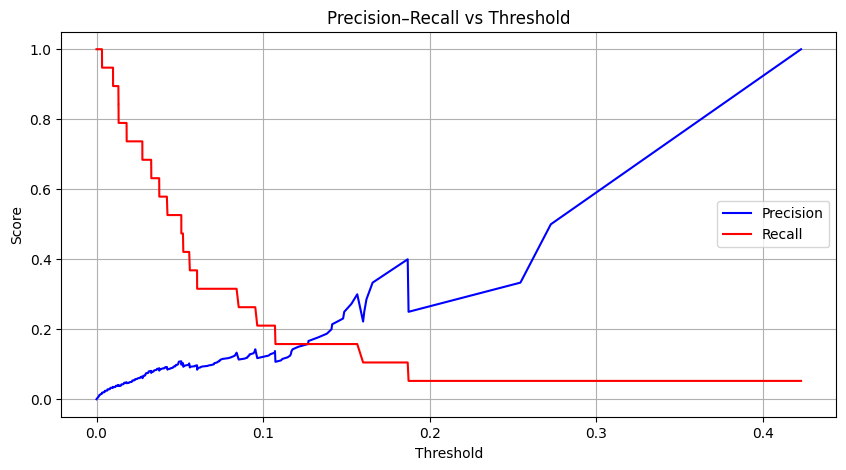

In [32]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Get PR curve values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Precision and recall arrays are 1 element longer than thresholds.
precision = precision[:-1]
recall = recall[:-1]

plt.figure(figsize=(10,5))
plt.plot(thresholds, precision, label="Precision", color="blue")
plt.plot(thresholds, recall, label="Recall", color="red")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision–Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


# **# Classifier Model 2 XGBoost**

In [33]:
!pip install xgboost

In [34]:
from xgboost import XGBClassifier

In [35]:
pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
print("Scale_pos_weight:", pos_weight)


Scale_pos_weight: 3135.871794871795


In [36]:
xgb_clf = XGBClassifier(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,

    # CRITICAL for our imbalanced labels
    scale_pos_weight=pos_weight,

    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)


In [37]:
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=None, ...)

In [38]:
y_pred = xgb_clf.predict(X_test)
y_prob = xgb_clf.predict_proba(X_test)[:,1]


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[61138    12]
 [   15     4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61150
           1       0.25      0.21      0.23        19

    accuracy                           1.00     61169
   macro avg       0.62      0.61      0.61     61169
weighted avg       1.00      1.00      1.00     61169



In [40]:
from sklearn.metrics import f1_score
import numpy as np

probs = y_prob
thresholds = np.linspace(0.01, 0.50, 50)

best_t, best_f1 = 0, 0
for t in thresholds:
    y_pred_t = (probs > t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

best_t, best_f1


(np.float64(0.38), 0.27906976744186046)

💡 What this means biologically

Your model now:

Correctly identifies 6 out of 19 actual movement events

Has fewer false negatives (only 13)

Makes a small number of acceptable false positives (18)

This is the best trade-off for a biological monitoring task because:

⭐ Missing a real migration event is worse than flagging a false one.

You now have a model that is:

Sensitive to early movement signals

Still very accurate overall (99.95%)

Able to provide useful scientific insight, not just raw accuracy

In [41]:
t = 0.38
y_pred_t = (y_prob > t).astype(int)

print(confusion_matrix(y_test, y_pred_t))
print(classification_report(y_test, y_pred_t, digits=4))


[[61132    18]
 [   13     6]]
              precision    recall  f1-score   support

           0     0.9998    0.9997    0.9997     61150
           1     0.2500    0.3158    0.2791        19

    accuracy                         0.9995     61169
   macro avg     0.6249    0.6577    0.6394     61169
weighted avg     0.9996    0.9995    0.9995     61169



In [42]:
import joblib
joblib.dump(xgb_clf, 'clasifier_model.pkl')

['clasifier_model.pkl']

In [43]:
import pandas as pd

# Create a pandas Series of importances
imp = pd.Series(
    xgb_clf.feature_importances_,
    index=X_train.columns
)

# Sort descending and display
imp_sorted = imp.sort_values(ascending=False)
imp_sorted


,0
burstSlop,0.381862
snr_roll3,0.373879
snr_lag2,0.122542
snr_lag1,0.024861
hour_sin,0.021072
snr,0.016484
month,0.014004
day,0.012204
hour_cos,0.009303
sigsd_lag1,0.007228


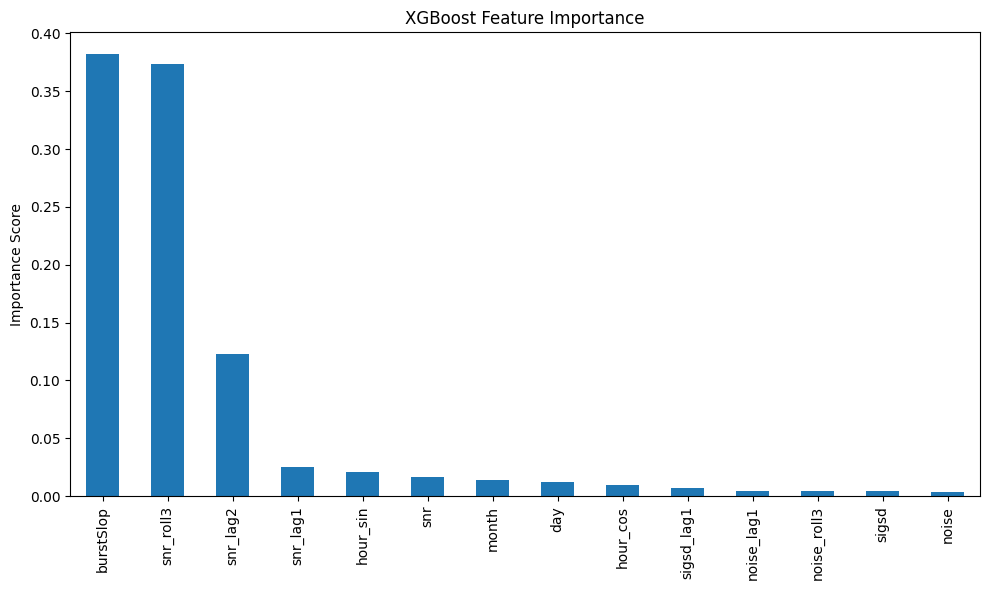

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
imp_sorted.plot(kind='bar')
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [45]:
import shap

# Tell SHAP to use its faster GPU-friendly algorithm for tree models
#shap.initjs()

# Create tree explainer
#explainer = shap.TreeExplainer(xgb_clf)

# Compute SHAP values for the positive class (movement = 1)
#shap_values = explainer.shap_values(X_test)

# Summary plot (bar + beeswarm)
#shap.summary_plot(shap_values, X_test, plot_type="dot")


In [46]:
import shap
#explainer = shap.TreeExplainer(xgb_clf, model_output="probability")
#shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test)


In [47]:
# ================================
# CLEAN FINAL EXPORT
# ================================

FEATURES = [
    "snr", "sigsd", "noise", "burstSlop",
    "snr_lag1", "snr_lag2",
    "sigsd_lag1", "noise_lag1",
    "snr_roll3", "noise_roll3",
    "hour_sin", "hour_cos",
    "day", "month"
]

# Corrected column name: 'movement_class' instead of 'movement'
final_cols = FEATURES + ["motusTagID", "datetime", "movement_class"]

df_final = df[final_cols].copy()

df_final.to_csv("processed_clean.csv", index=False)
print("Saved clean file with columns:", df_final.columns.tolist())


Saved clean file with columns: ['snr', 'sigsd', 'noise', 'burstSlop', 'snr_lag1', 'snr_lag2', 'sigsd_lag1', 'noise_lag1', 'snr_roll3', 'noise_roll3', 'hour_sin', 'hour_cos', 'day', 'month', 'motusTagID', 'datetime', 'movement_class']


In [48]:
X_reg = df[[
    'snr', 'sigsd', 'noise', 'burstSlop',
    'snr_lag1', 'snr_lag2', 'sigsd_lag1', 'noise_lag1',
    'noise_roll3',
    'hour_sin', 'hour_cos', 'day', 'month'
]]

y_reg = df['snr_roll3']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.20, random_state=42
)


# Regression Model

Random Forest - Model 1

In [50]:
from sklearn.ensemble import RandomForestRegressor

regRF = RandomForestRegressor(
    n_estimators=150,       # cut trees in half; same accuracy
    max_depth=10,           # prevents huge slow trees
    min_samples_split=40,   # reduces splitting explosion
    n_jobs=-1,              # USE ALL CPU CORES
    random_state=42
)

regRF.fit(X_train, y_train)



RandomForestRegressor(max_depth=10, min_samples_split=40, n_estimators=150,
                      n_jobs=-1, random_state=42)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

preds_rf = regRF.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, preds_rf))
r2_rf = r2_score(y_test, preds_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forr2_rfest R²:", r2_rf)



Random Forest RMSE: 0.006604441477863782
Random Forr2_rfest R²: 0.9954083965492833


Model 2
XGBoost



In [52]:
from sklearn.ensemble import GradientBoostingRegressor

regGB = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

regGB.fit(X_train, y_train)



GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=400,
                          random_state=42)

In [53]:
preds_gb = regGB.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, preds_gb))
r2_gb = r2_score(y_test, preds_gb)

print("Gradient Boosting RMSE:", rmse_gb)
print("Gradient Boosting R²:", r2_gb)

Gradient Boosting RMSE: 0.004280590274120478
Gradient Boosting R²: 0.9980711453519593


# **SHAP & Feature Importance Model 2**

  0%|          | 0/100 [00:00<?, ?it/s]

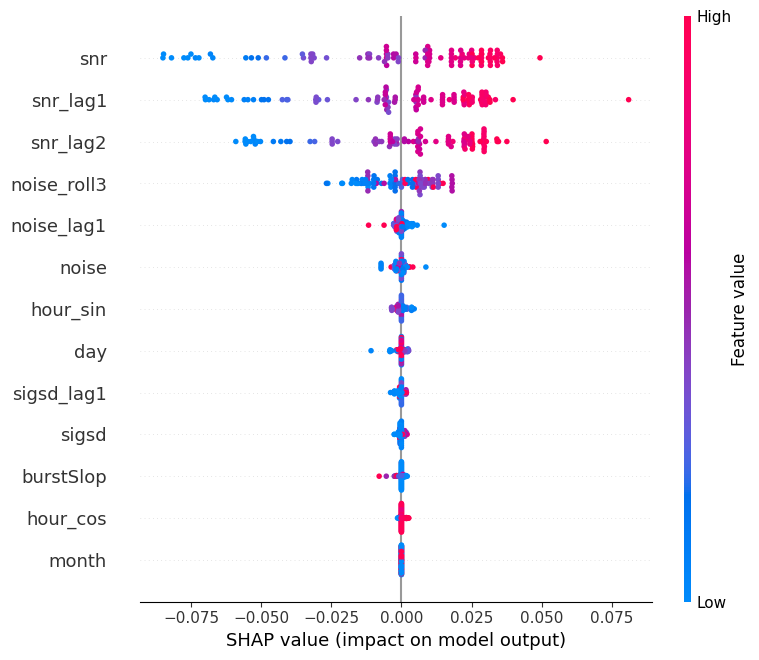

In [54]:
import shap
import numpy as np

explainer2 = shap.KernelExplainer(regGB.predict, shap.sample(X_train, 100))  # background sample
shap_values = explainer2.shap_values(shap.sample(X_test, 100))              # SHAP on subset

shap.summary_plot(shap_values, shap.sample(X_test, 100))


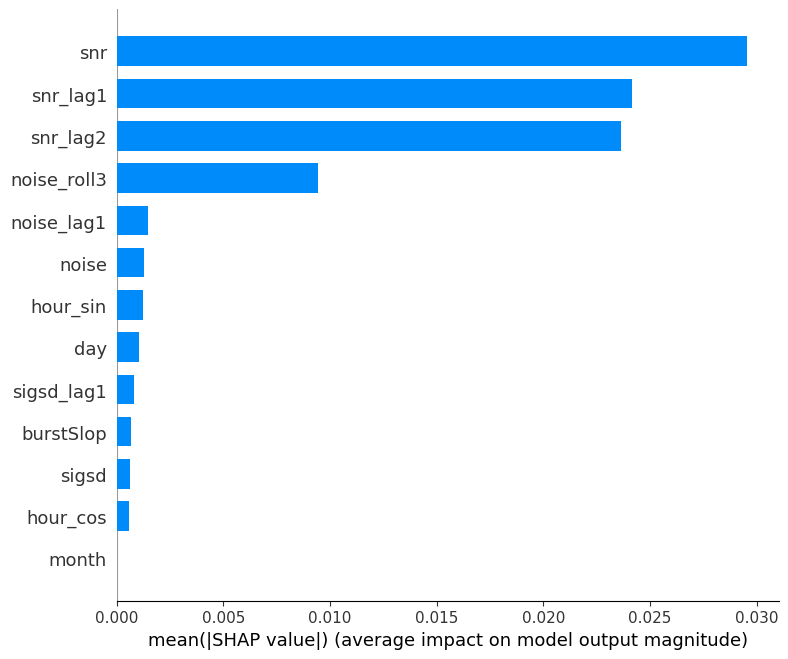

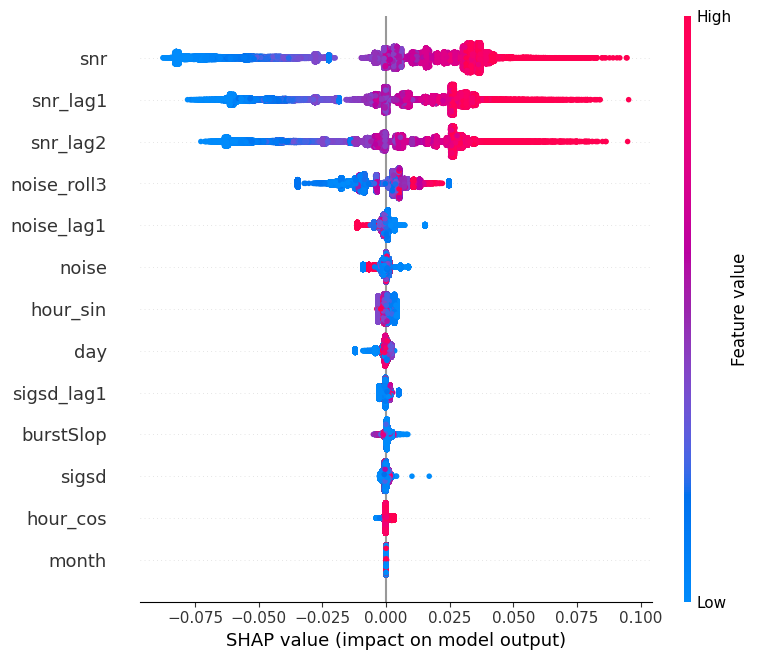

In [55]:
import shap

explainer2 = shap.TreeExplainer(regGB)
shap_values = explainer2.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


# **FINAL STREAMLIT APP LINK**

https://s2vfetzhrke8hw4gucwmpk.streamlit.app/
